In [1]:
import pandas as pd
import os

In [2]:
pwd

'/Users/orin/Data Science/MODULE 1/Module-1-Project/Movie_Analysis'

In [3]:
from glob import glob

In [4]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [5]:
type(csv_files)
d = {}

In [6]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [7]:
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [8]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_").replace('_gz','') # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [9]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [643]:
csv_files_dict['imdb_title_crew']

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


In [11]:
import sqlite3

In [20]:
conn = sqlite3.connect("movies_db.sqlite") 
cur = conn.cursor()

In [16]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [17]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table imdb_title_crew
Table 'imdb_title_crew' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table imdb_title_akas
Table 'imdb_title_akas' already exists.
could not make table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table imdb_title_basics
Table 'imdb_title_basics' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_title_principals
Table 'imdb_title_principals' already exists.


In [261]:
cur.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('tmdb_movies',),
 ('imdb_title_akas',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_basics',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('imdb_title_principals',),
 ('films_by_awards.csv',),
 ('films_by_awards',),
 ('films_by_awards1',),
 ('films_by_awards2',)]

Cleaning tn_movie_budgets to have just year for release date

In [401]:
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']

In [404]:
tn_movie_budgets_df.shape

(5782, 5)

In [407]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [408]:
tn_movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [409]:
tn_movie_budgets_df['year'] =  pd.DatetimeIndex(tn_movie_budgets_df['release_date']).year

In [670]:
tn_movie_budgets_df 


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747
...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0,2018,-7000
79,"Apr 2, 1999",Following,6000,48482,240495,1999,234495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,-3662


In [414]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [415]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets_df = convert_amt_to_int(tn_movie_budgets_df, col)

In [417]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year                 5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


Checking values to make sure they are clean

In [419]:
for col in tn_movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{tn_movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
Home                  0.000519
King Kong             0.000519
Halloween             0.000519
Fantastic Four        0.000346
Death at a Funeral    0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0.0015

In [462]:
tn_movie_budgets_df['budget_gross_profit'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747


In [422]:
create_sql_table_from_df(tn_movie_budgets_df, 'tn_movie_budgets_clean', conn)

Created table tn_movie_budgets_clean


Importing dataframe of our scraped Academy-Award winning films, cleaning the column names

In [ ]:
df2 = pd.read_csv('films_by_awards.csv')
df2.rename(columns = {"Film\n": "film", "Awards\n": "awards", "Nominations\n": "nominations", "Year\n": "year"}, inplace=True)
df2
create_sql_table_from_df(df2, 'films_by_awards2', conn)

Joining academy awards winner data to table of gross and profit data

In [1017]:
cur.execute('''SELECT b.*, awards, nominations
                FROM tn_movie_budgets_clean b
                LEFT JOIN films_by_awards2 a
                ON a.film = b.movie
                AND a.year = b.year
                ORDER BY budget_gross_profit DESC
                ''')

awards_to_budget_df = pd.DataFrame(cur.fetchall())
awards_to_budget_df.columns = [x[0] for x in cur.description]
awards_to_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget_gross_profit,awards,nominations
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,3,9
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,11,14
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,None,None
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,None,None
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,1433854864,None,None
...,...,...,...,...,...,...,...,...,...,...
5777,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,2001,-94635231,None,None
5778,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,2019,-106900000,None,None
5779,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,2011,-110450242,None,None
5780,95,"Dec 31, 2020",Moonfall,150000000,0,0,2020,-150000000,None,None


In [1018]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1019]:
awards_to_budget_df['awards'].unique()

array(['3', '11', None, '2', '1', '4', '6', '7', '5', '8 (2)', '8',
       '4 (1)', '0 (1)', '1 (1)', '9', '0 (2)', '10', '5 (1)', '7 (1)'],
      dtype=object)

In [1020]:
awards_to_budget_df['nominations'].unique()

array(['9', '14', None, '7', '2', '11', '3', '5', '4', '1', '6', '8',
       '13', '10', '12', '10[4]\n', '0', '6[11]\n'], dtype=object)

cleaning awards data

In [1021]:
def clean_vals(df, col):
    df[col] = df[col].str.rstrip('\n').str.replace("\(.*\)", "").fillna("0").astype('int')
    return df

In [1022]:
academy_award_cols = ['awards']

for col in academy_award_cols:
    awards_to_budget_df = clean_vals(awards_to_budget_df, col)

In [1023]:
awards_to_budget_df['awards'].unique()

array([ 3, 11,  0,  2,  1,  4,  6,  7,  5,  8,  9, 10])

In [1025]:
awards_to_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
id                     5782 non-null int64
release_date           5782 non-null object
movie                  5782 non-null object
production_budget      5782 non-null int64
domestic_gross         5782 non-null int64
worldwide_gross        5782 non-null int64
year                   5782 non-null int64
budget_gross_profit    5782 non-null int64
awards                 5782 non-null int64
nominations            362 non-null object
dtypes: int64(7), object(3)
memory usage: 451.8+ KB


In [ ]:
awards_to_budget_df['nominations'].unique()

creating simple frame with only our desired data

In [1028]:
budget_awards_df = awards_to_budget_df[['production_budget', 'awards']]
budget_awards_df

,production_budget,awards
0,425000000,3
1,200000000,11
2,300000000,0
3,306000000,0
4,215000000,0
...,...,...
5777,105000000,0
5778,110000000,0
5779,150000000,0
5780,150000000,0


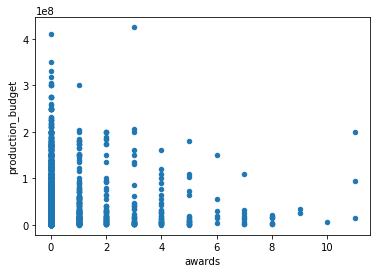

In [1041]:
ax = budget_awards_df.plot.scatter(x='awards', y='production_budget')

In [1047]:
import seaborn as sns

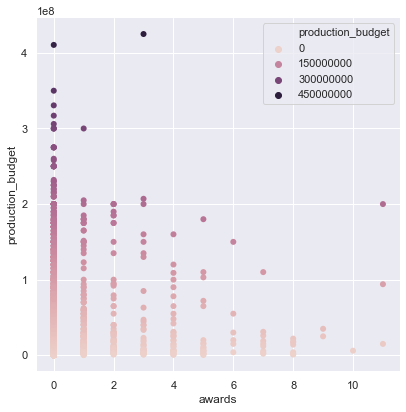

In [1064]:
sns.set(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="awards", y="production_budget",
                hue="production_budget",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=budget_awards_df, ax=ax)